# Lung Cancer using ANN

## import libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix
from tensorflow.keras import Sequential , regularizers , callbacks
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,Callback
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout
from tensorflow.keras.initializers import GlorotUniform

### Read the Data

In [2]:
df = pd.read_csv('/content/Lung Cancer.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.tail()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,890000,55.0,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


## Make EDA to Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [5]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include='O')

,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,treatment_type,end_treatment_date
count,890000,890000,890000,890000,890000,890000,890000,890000
unique,2,27,3651,4,2,4,4,4194
top,Male,Malta,2024-05-15,Stage III,No,Passive Smoker,Chemotherapy,2023-12-09
freq,445134,33367,306,222594,445181,223170,223262,294


In [7]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(['id'] , axis=1 , inplace=True)

### Make a loop to show the distribution of the numeric columns

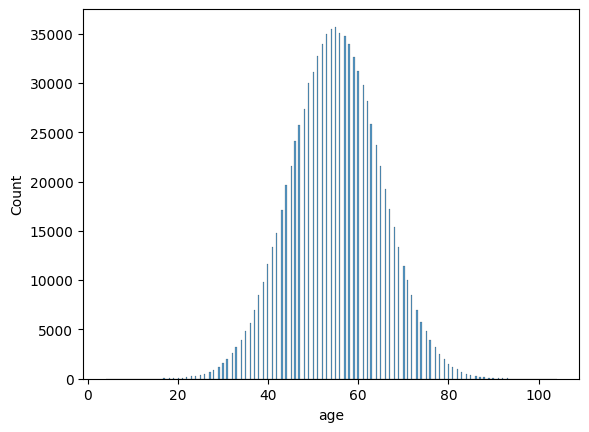

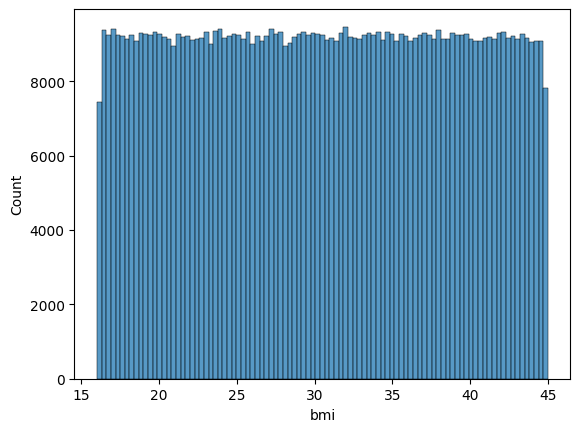

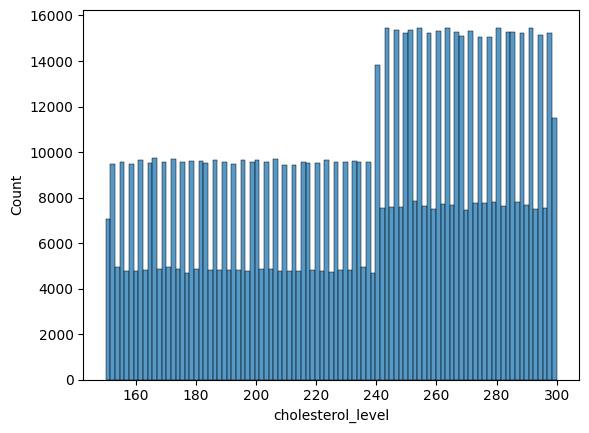

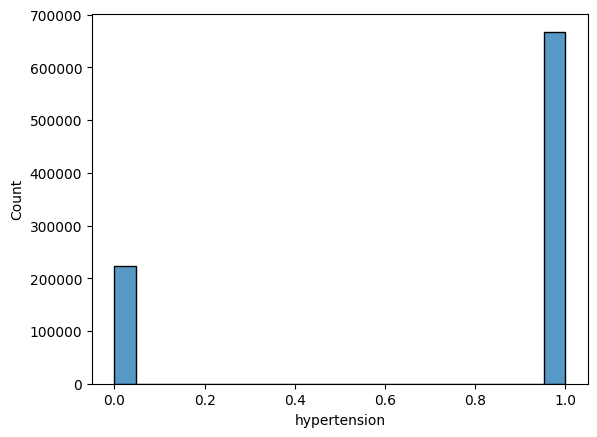

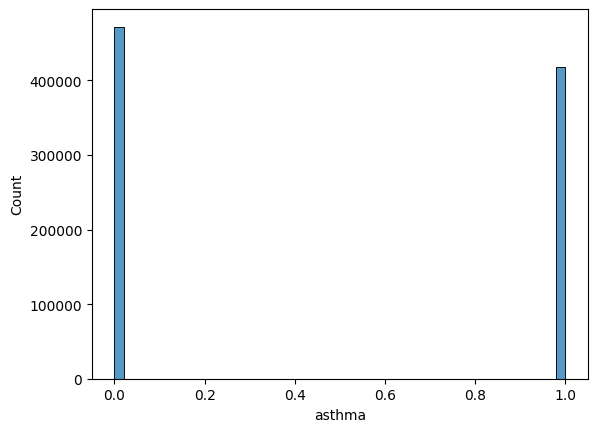

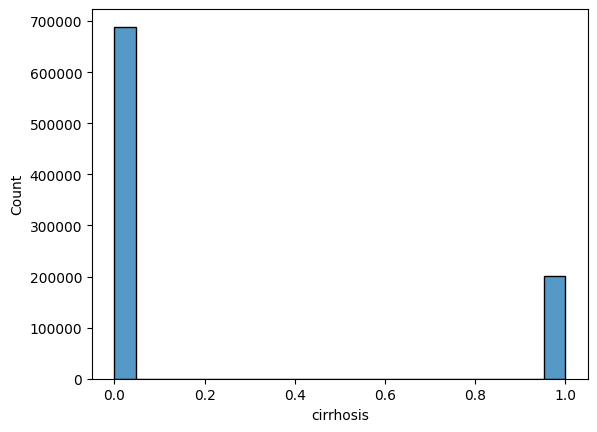

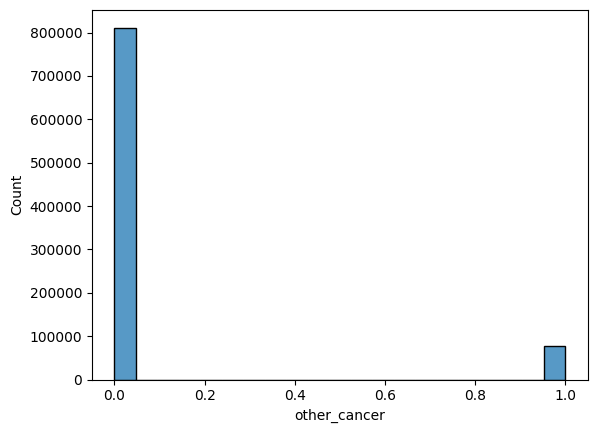

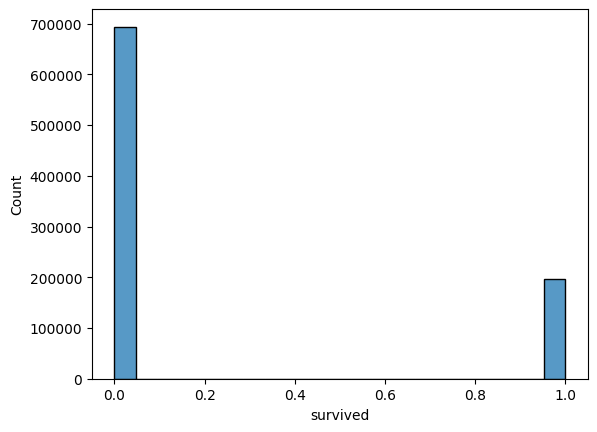

In [10]:
for col in df.select_dtypes('number'):
  plt.figure()
  sns.histplot(data = df , x = col)

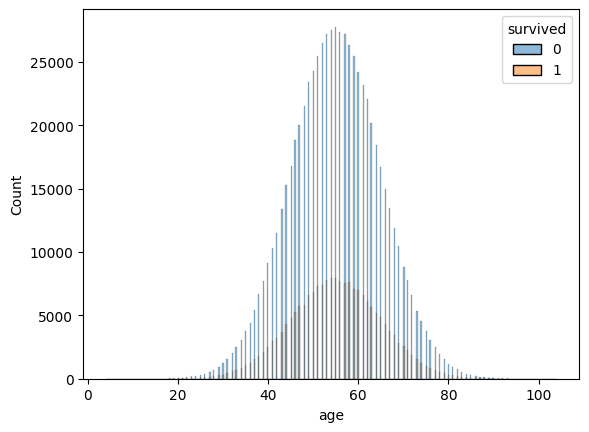

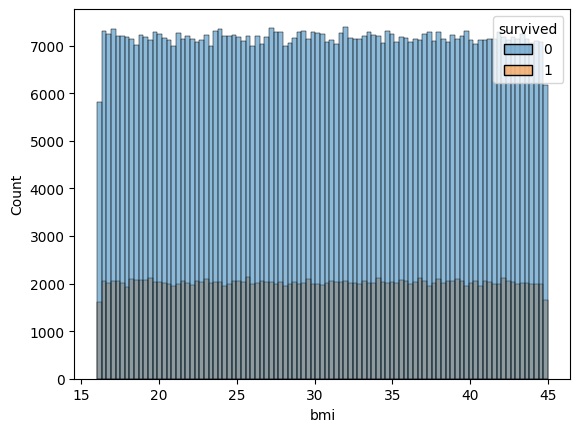

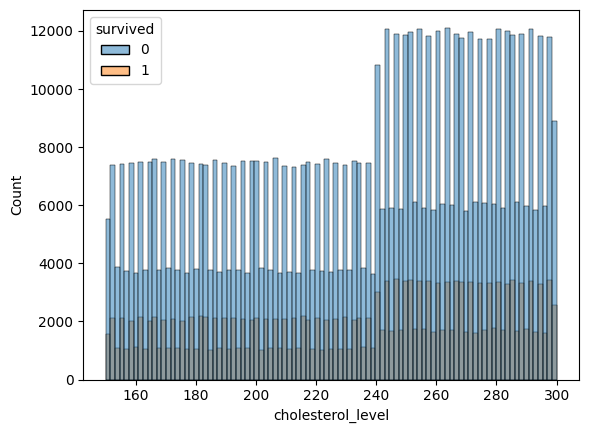

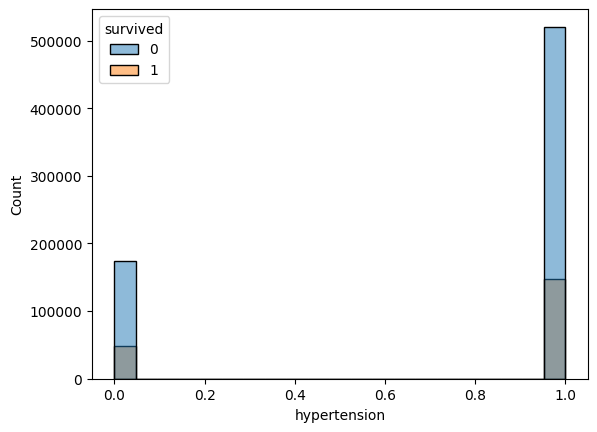

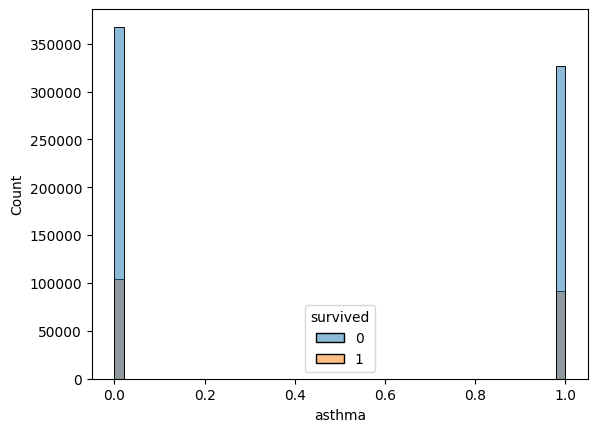

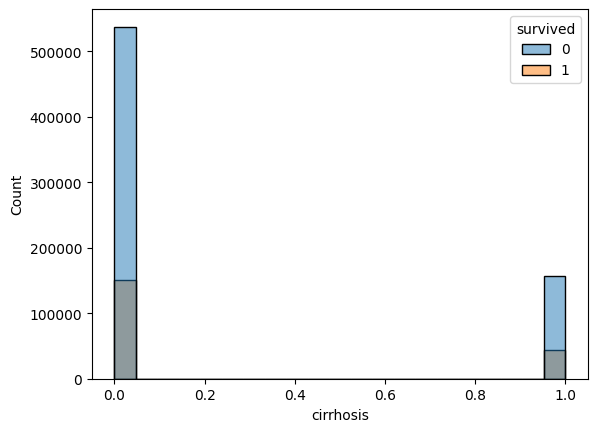

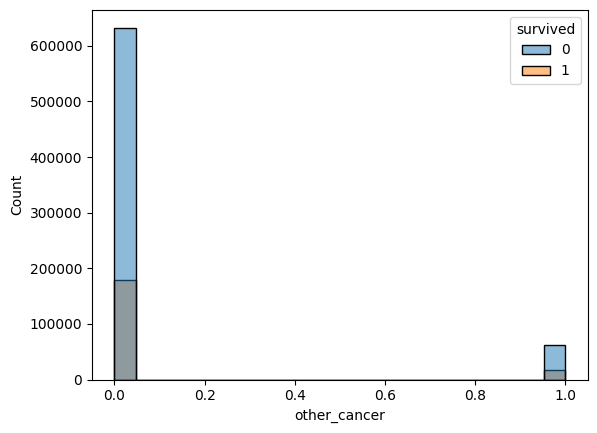

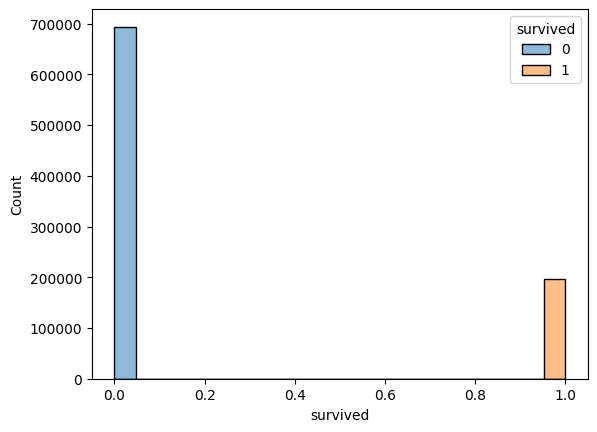

In [11]:
for col in df.select_dtypes('number'):
  plt.figure()
  sns.histplot(data = df , x = col , hue='survived')

### Make a loop to show the distribution of the categorical columns

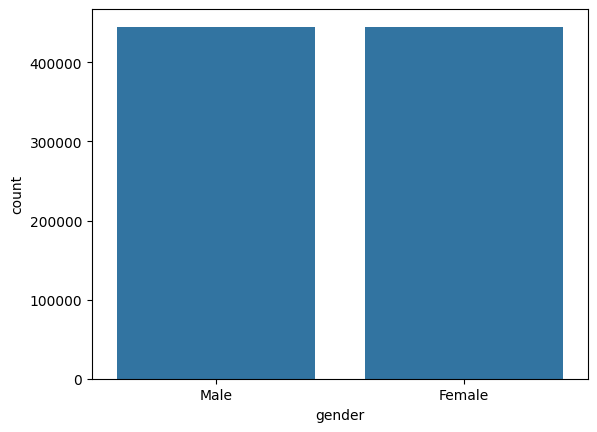

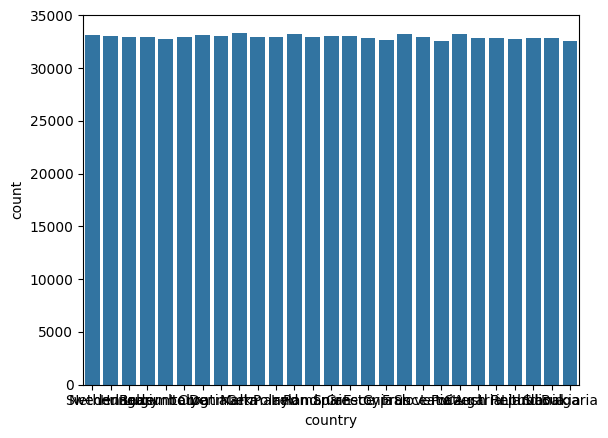

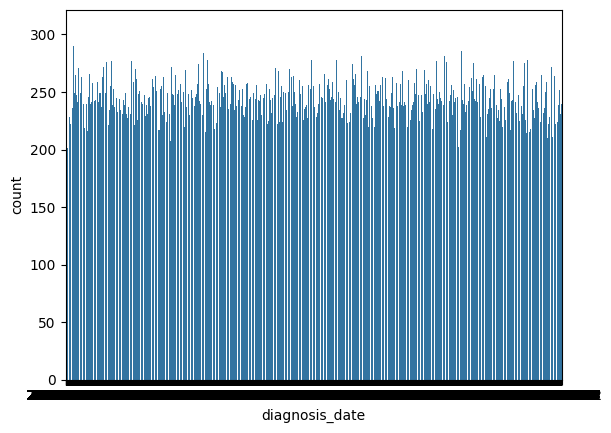

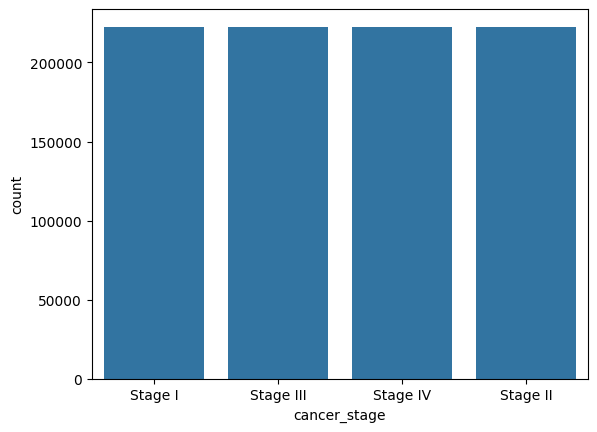

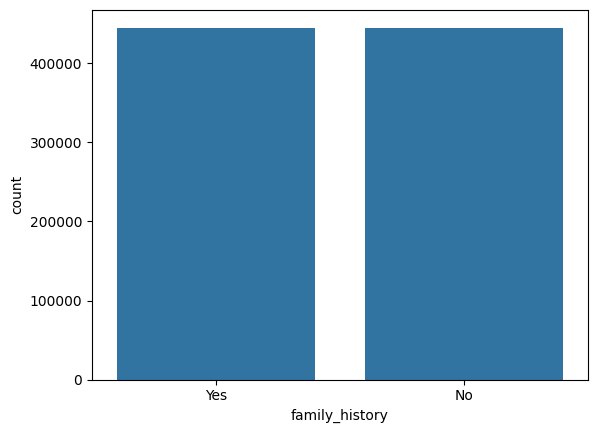

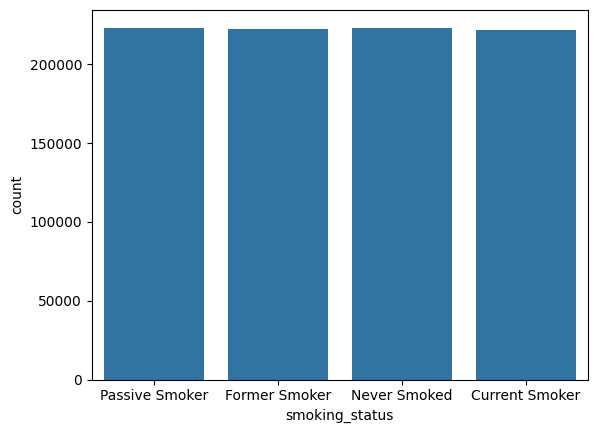

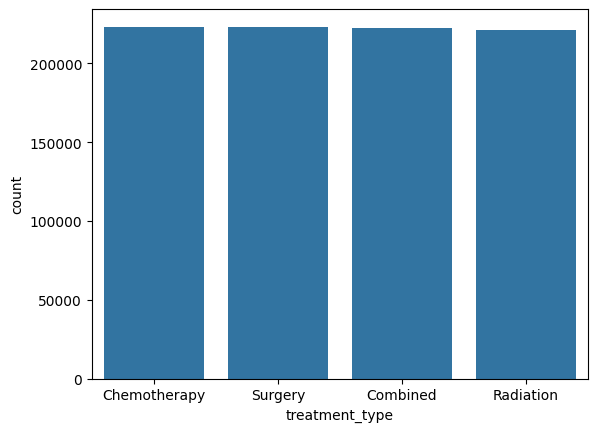

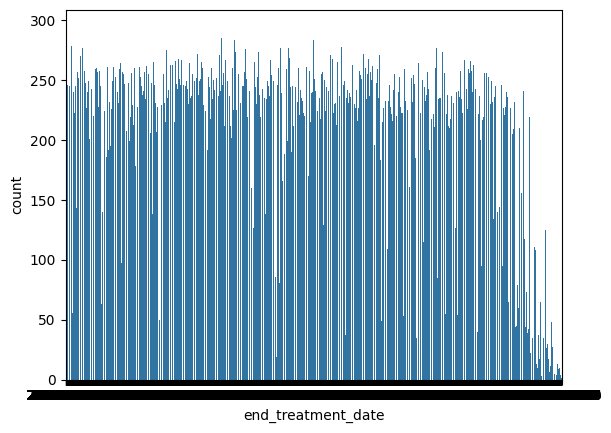

In [12]:
for col in df.select_dtypes('object'):
  plt.figure()
  sns.countplot(data = df , x = col)

### Visualize the distribution of each categorical column and its relationship with survival


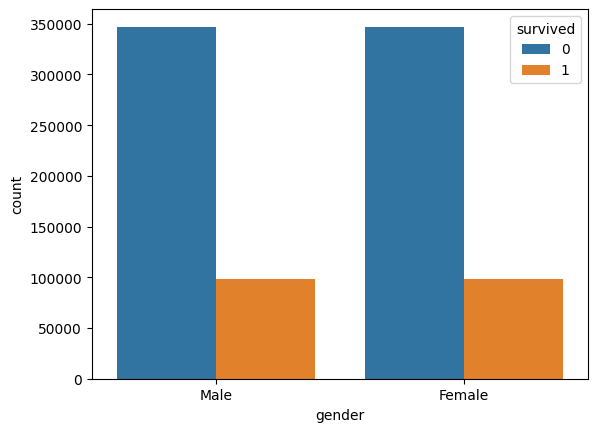

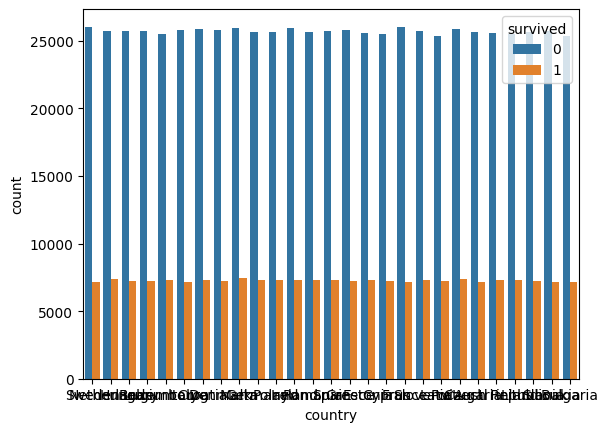

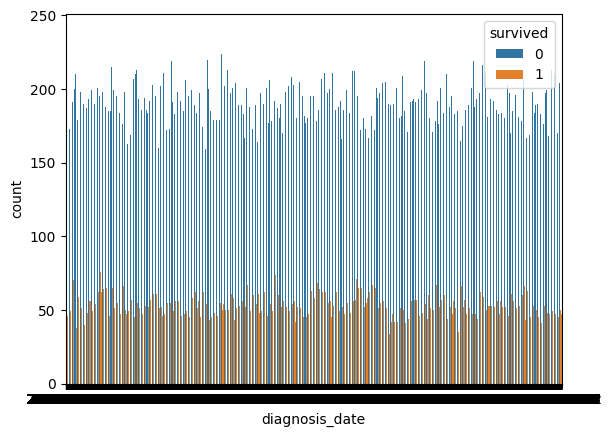

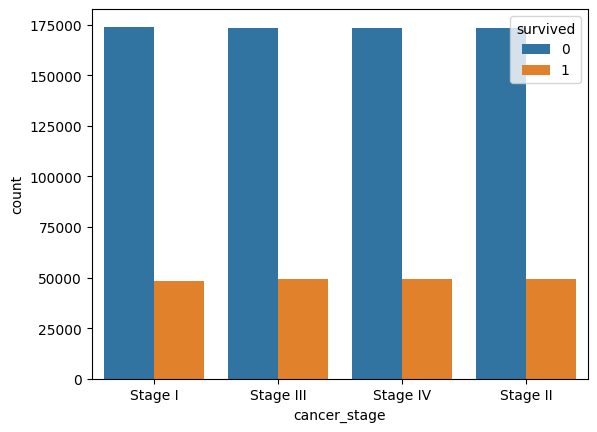

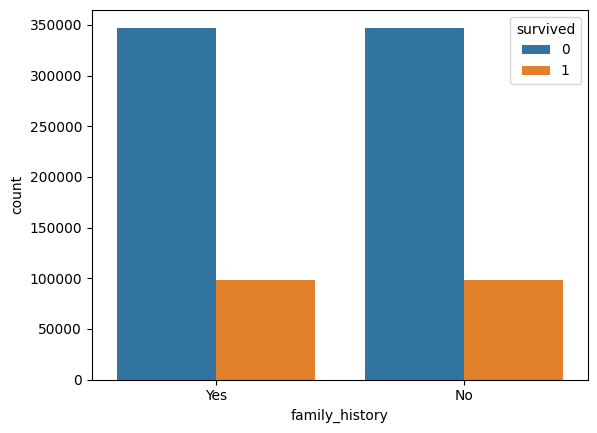

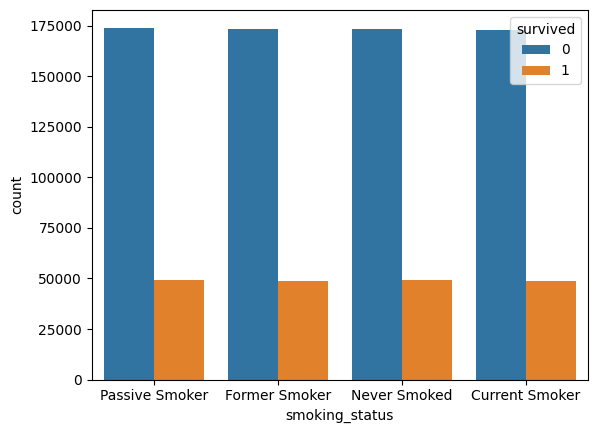

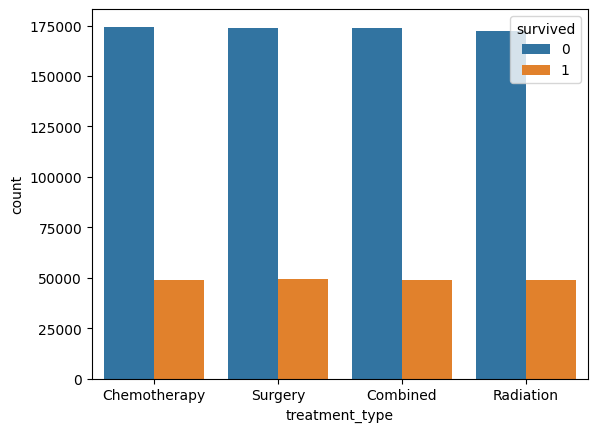

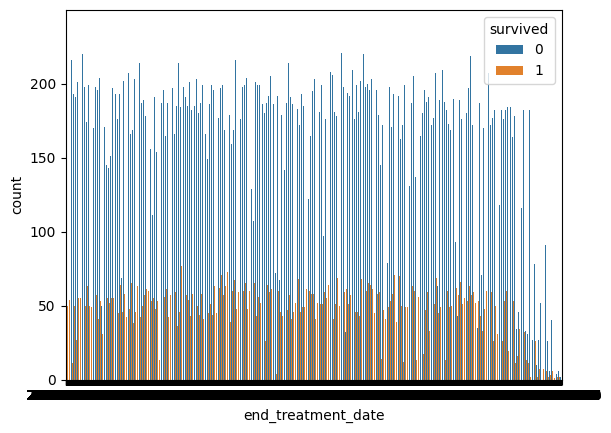

In [13]:
for col in df.select_dtypes('object'):
  plt.figure()
  sns.countplot(data = df , x = col , hue='survived')

### Show the number of unique values for each categorical column


In [14]:
df.select_dtypes('object').nunique()

,0
gender,2
country,27
diagnosis_date,3651
cancer_stage,4
family_history,2
smoking_status,4
treatment_type,4
end_treatment_date,4194


### Display the unique values for each categorical column in the dataset


In [15]:
for x in df.select_dtypes('object'):
  print(f"The unique values of {x} are {df[x].unique()}")
  print('*'*100)

The unique values of gender are ['Male' 'Female']
****************************************************************************************************
The unique values of country are ['Sweden' 'Netherlands' 'Hungary' 'Belgium' 'Luxembourg' 'Italy' 'Croatia'
 'Denmark' 'Malta' 'Germany' 'Poland' 'Ireland' 'Romania' 'Spain' 'Greece'
 'Estonia' 'Cyprus' 'France' 'Slovenia' 'Latvia' 'Portugal' 'Austria'
 'Czech Republic' 'Finland' 'Lithuania' 'Slovakia' 'Bulgaria']
****************************************************************************************************
The unique values of diagnosis_date are ['2016-04-05' '2023-04-20' '2023-04-05' ... '2017-12-27' '2021-04-22'
 '2020-04-02']
****************************************************************************************************
The unique values of cancer_stage are ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
****************************************************************************************************
The unique values of 

### Convert the columns 'diagnosis_date' and 'end_treatment_date' to datetime format


In [16]:
for col in ['diagnosis_date', 'end_treatment_date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

### Extract year, month, and day from 'diagnosis_date' into separate columns


In [17]:
df['diagnosis_year'] = df['diagnosis_date'].dt.year
df['diagnosis_month'] = df['diagnosis_date'].dt.month
df['diagnosis_day'] = df['diagnosis_date'].dt.day

### Extract year, month, and day from 'end_treatment_date' into separate columns


In [18]:
df['end_year'] = df['end_treatment_date'].dt.year
df['end_month'] = df['end_treatment_date'].dt.month
df['end_day'] = df['end_treatment_date'].dt.day

### Calculate treatment duration in days as the difference between 'end_treatment_date' and 'diagnosis_date'


In [19]:
df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

In [20]:
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,...,treatment_type,end_treatment_date,survived,diagnosis_year,diagnosis_month,diagnosis_day,end_year,end_month,end_day,treatment_duration_days
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,...,Chemotherapy,2017-09-10,0,2016,4,5,2017,9,10,523
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,...,Surgery,2024-06-17,1,2023,4,20,2024,6,17,424
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,...,Combined,2024-04-09,0,2023,4,5,2024,4,9,370
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,...,Chemotherapy,2017-04-23,0,2016,2,5,2017,4,23,443
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,...,Combined,2025-01-08,0,2023,11,29,2025,1,8,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,...,Radiation,2023-02-23,0,2022,7,1,2023,2,23,237
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,...,Surgery,2017-06-19,0,2015,9,27,2017,6,19,631
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,...,Combined,2017-01-23,1,2016,3,27,2017,1,23,302
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,...,Chemotherapy,2017-12-12,0,2015,12,22,2017,12,12,721


### Visualize the relationship between diagnosis year and survival


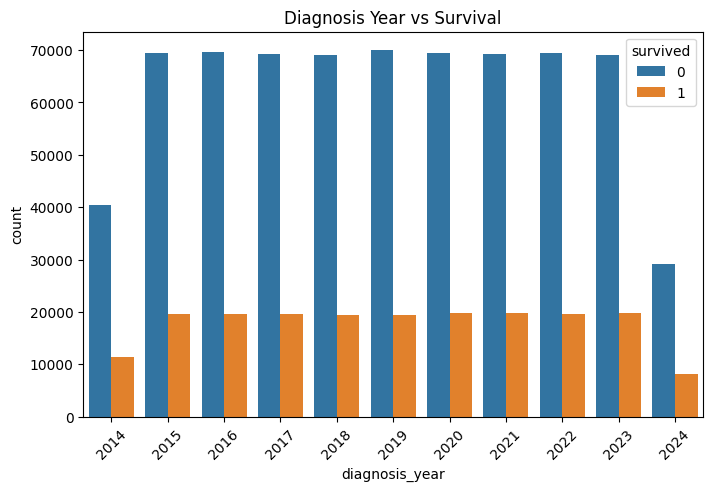

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='diagnosis_year', hue='survived')
plt.title("Diagnosis Year vs Survival")
plt.xticks(rotation=45)
plt.show()

### Visualize the relationship between diagnosis month and survival


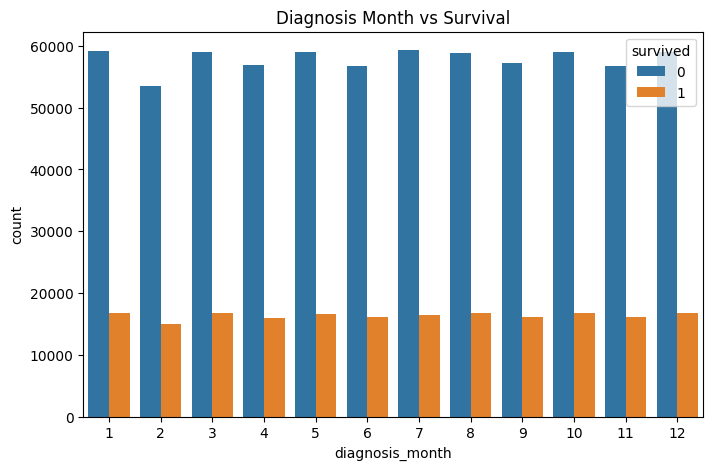

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='diagnosis_month', hue='survived')
plt.title("Diagnosis Month vs Survival")
plt.show()

### Visualize the distribution of treatment duration (in days) and its relationship with survival


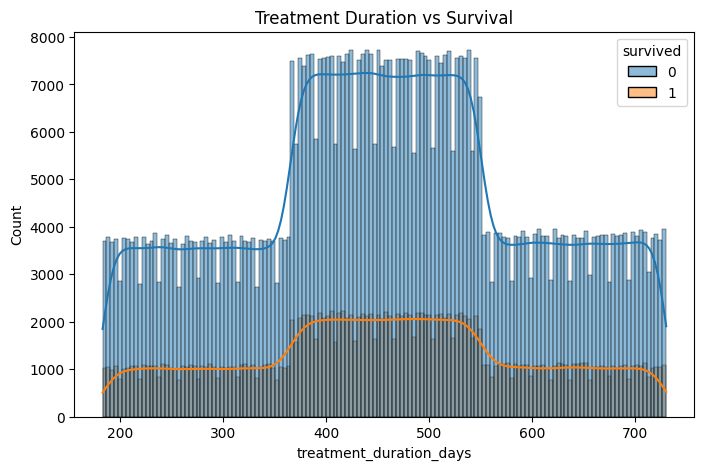

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='treatment_duration_days', hue='survived', kde=True)
plt.title("Treatment Duration vs Survival")
plt.show()

In [24]:
df.columns

Index(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'diagnosis_year', 'diagnosis_month',
       'diagnosis_day', 'end_year', 'end_month', 'end_day',
       'treatment_duration_days'],
      dtype='object')

### Drop unnecessary date-related columns after feature extraction


In [25]:
df.drop(['diagnosis_year', 'diagnosis_month',
       'diagnosis_day', 'end_year', 'end_month', 'end_day',
       'treatment_duration_days','end_treatment_date','diagnosis_date'] , axis=1 , inplace=True)

In [26]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,0
889996,62.0,Female,Cyprus,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,0
889997,48.0,Female,Estonia,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,1
889998,67.0,Female,Slovakia,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,0


<Axes: xlabel='survived', ylabel='count'>

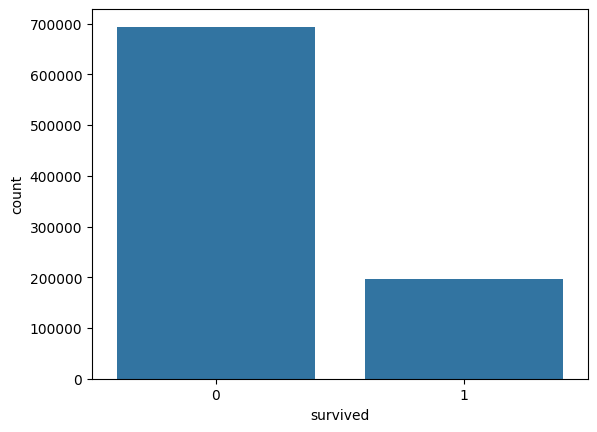

In [33]:
sns.countplot(data=df , x='survived')

In [34]:
for x in df.select_dtypes('object'):
  print(f"The unique values of {x} are {df[x].unique()}")
  print('*'*100)

The unique values of gender are ['Male' 'Female']
****************************************************************************************************
The unique values of country are ['Sweden' 'Netherlands' 'Hungary' 'Belgium' 'Luxembourg' 'Italy' 'Croatia'
 'Denmark' 'Malta' 'Germany' 'Poland' 'Ireland' 'Romania' 'Spain' 'Greece'
 'Estonia' 'Cyprus' 'France' 'Slovenia' 'Latvia' 'Portugal' 'Austria'
 'Czech Republic' 'Finland' 'Lithuania' 'Slovakia' 'Bulgaria']
****************************************************************************************************
The unique values of cancer_stage are ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
****************************************************************************************************
The unique values of family_history are ['Yes' 'No']
****************************************************************************************************
The unique values of smoking_status are ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Cur

### Make Encoding for the categorical columns

In [35]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['family_history'] = le.fit_transform(df['family_history'])

In [36]:
stage_mapping = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}
df['cancer_stage'] = df['cancer_stage'].map(stage_mapping)

In [37]:
col_hot = ['country' , 'smoking_status' , 'treatment_type']

In [38]:

ohe = OneHotEncoder(sparse_output=False , drop = 'first')

df = pd.concat([df , pd.DataFrame(ohe.fit_transform(df[col_hot]) ,
                             columns=ohe.get_feature_names_out())] , axis = 1 ).drop(col_hot , axis = 1 )

In [39]:
df

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,...,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,1,1,1,29.4,199,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50.0,0,3,1,41.2,280,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,65.0,0,3,1,44.0,268,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51.0,0,1,0,43.0,241,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.0,1,1,0,19.7,178,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,1,4,0,44.8,243,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
889996,62.0,0,2,1,21.6,240,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889997,48.0,0,3,1,38.6,242,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
889998,67.0,0,4,1,18.6,194,1,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Split the data

In [40]:
x , y = df.drop(['survived'] , axis=1) , df['survived']

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

#### Apply hybrid resampling: first undersample the majority class, then oversample the minority class using SMOTE


In [42]:
under = RandomUnderSampler(sampling_strategy=0.43 ,random_state=42)
x_trian_under , y_train_under = under.fit_resample(x_train , y_train)

In [43]:
over = SMOTE(sampling_strategy=1.0 , random_state=42)
x_train_resampled , y_train_resampled = over.fit_resample(x_trian_under , y_train_under)

In [44]:
sclr = StandardScaler()
x_train_resampled = sclr.fit_transform(x_train_resampled)
x_test = sclr.transform(x_test)

### Build a deep neural network


In [51]:
input_dim=x_train_resampled.shape[1]
input_dim

42

In [92]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim=x_train_resampled.shape[1]  , kernel_regularizer=regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                kernel_initializer=GlorotUniform(seed=42)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L1L2(0.01 , 0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [93]:
MyOptimizer = Adamax(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name="Adamax"
)

In [94]:
model.compile(optimizer=MyOptimizer , loss='binary_crossentropy' , metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,345 (67.75 KB)

 Trainable params: 16,865 (65.88 KB)

 Non-trainable params: 480 (1.88 KB)

In [96]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001 , restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [97]:
history = model.fit(x_train_resampled , y_train_resampled , epochs=100 , batch_size=50 , validation_split=0.2 , callbacks=[early_stopping , reduce_lr], verbose=1)

Epoch 1/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - accuracy: 0.6015 - loss: 2.1250 - val_accuracy: 0.6734 - val_loss: 0.6075 - learning_rate: 5.0000e-04
Epoch 2/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.6797 - loss: 0.6806 - val_accuracy: 0.7395 - val_loss: 0.3685 - learning_rate: 5.0000e-04
Epoch 3/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.6982 - loss: 0.6359 - val_accuracy: 0.7583 - val_loss: 0.3285 - learning_rate: 5.0000e-04
Epoch 4/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.6990 - loss: 0.6288 - val_accuracy: 0.7516 - val_loss: 0.3386 - learning_rate: 5.0000e-04
Epoch 5/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.6985 - loss: 0.6232 - val_accuracy: 0.7504 - val_loss: 0.3375 - learning_rate: 5.0000e-04
Epoch 6/100
11670/11670 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.7004 - loss: 0.6176 - val_accuracy: 0.7198 - val_loss: 0.3639 - learning_rate: 5.0000e-04
Epoch 7/100
11670/11670 ━━━━

In [91]:
print(model.evaluate(x_train_resampled , y_train_resampled))
print(model.evaluate(x_test , y_test))

22792/22792 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8820 - loss: 0.4808
[0.5445510745048523, 0.7236218452453613]
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7806 - loss: 0.5677
[0.5682730078697205, 0.7797696590423584]


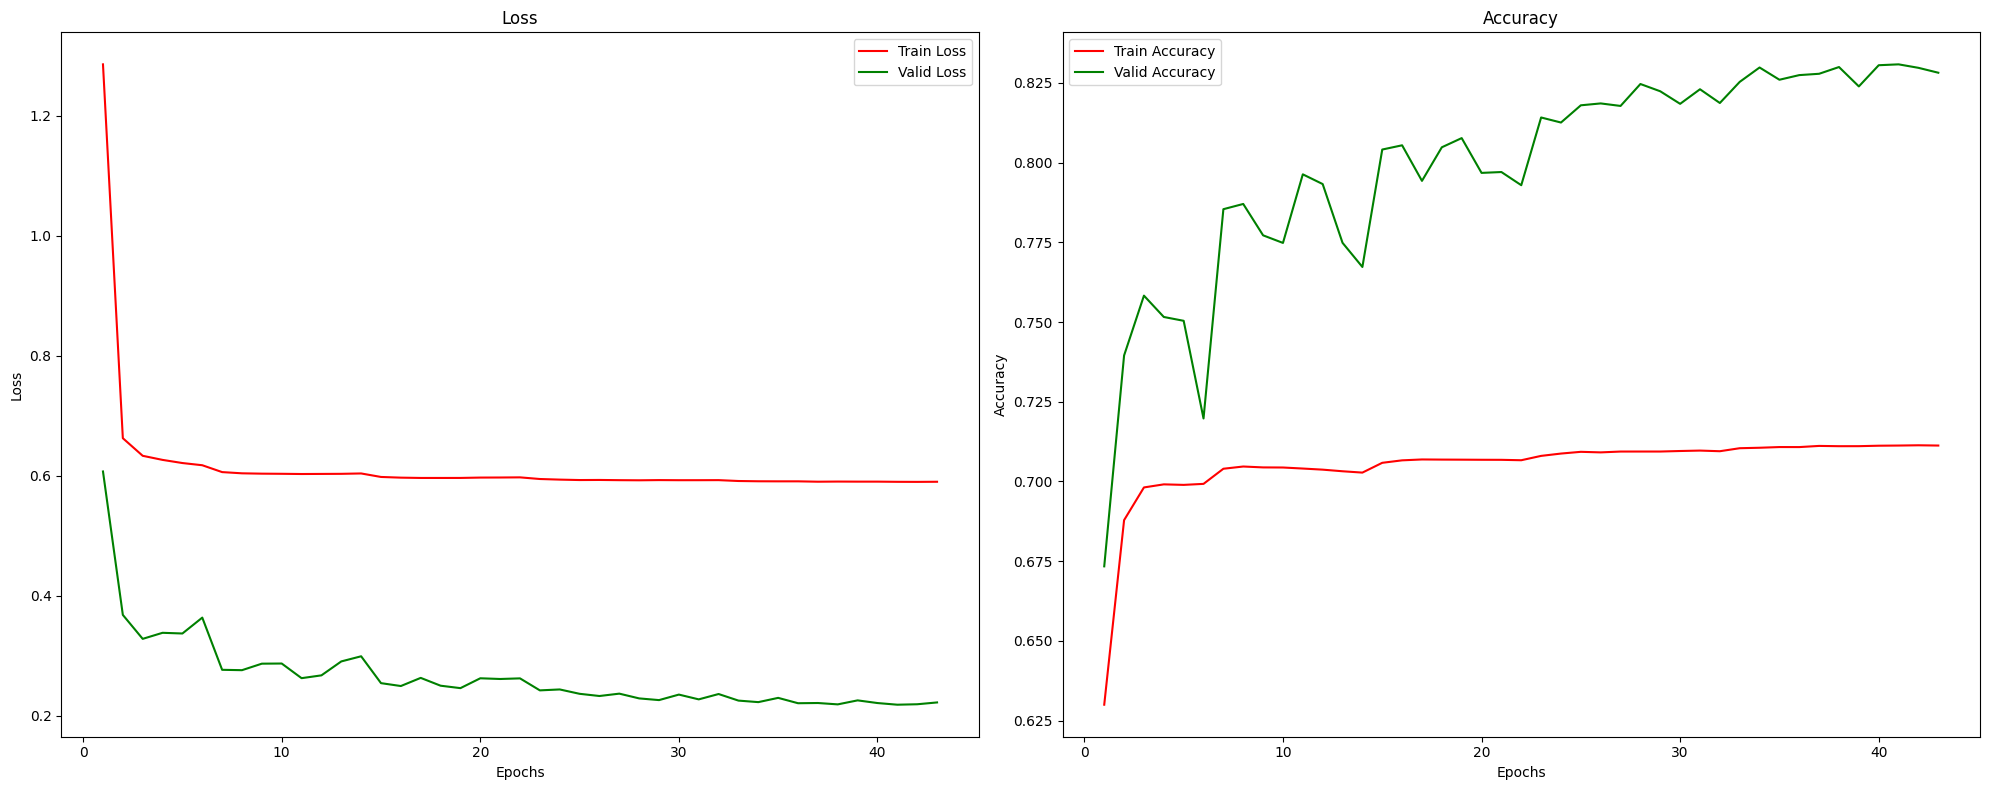

In [98]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()